<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/ml_tutor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to machine learning

Working examples are presented to introduce Machnine Learning tasks.


##Predicting wine quality from parameters

We use public white wine quality dataset. Let's download it!

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2023-12-18 14:36:13--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [  <=>               ] 258.23K   975KB/s    in 0.3s    

2023-12-18 14:36:13 (975 KB/s) - ‘winequality-white.csv’ saved [264426]



There are eleven parameters and a quality column in the downloaded csv file. The first few lies are the following (the column headers are in the first line):

In [3]:
!head winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


We will use different methods to predict quality from these parameters.

###Multiple regression

Supposing there are linear connections between the parameters and the quality we fit a hyper-plane on the data set.

First we read data using **pandas**.

In [4]:
import pandas
df = pandas.read_csv("winequality-white.csv", sep=';')
print(f"Number of records in the data set: {len(df.index)}")
df.head()

Number of records in the data set: 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Let's sperate training and test data sets. 25% of records will be used for **testing** the model.

In [5]:
features = list(df.columns)[:-1]
X = df[features]
y = df[df.columns[-1]]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

The distribution of different quality values in the train and test set.

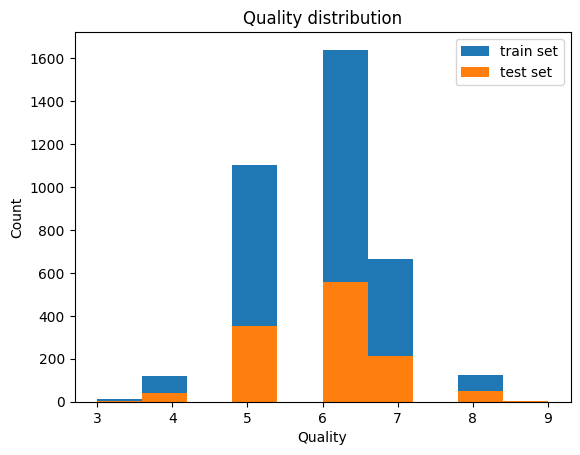

In [7]:
from matplotlib import pyplot as plt
plt.hist(y_train, label='train set')
plt.hist(y_test, label='test set')
plt.legend()
plt.xlabel('Quality')
plt.ylabel('Count')
_ = plt.title('Quality distribution')

In [8]:
# creating the model
from sklearn import linear_model
regr = linear_model.LinearRegression()
_ = regr.fit(X_train, y_train)

Calculating some statistical data using the model on the test set. Let's display also the distribution of differences.

mean difference: 0.0; mean error: 0.8; min diff -3.0; max diff 5.0
52.3% fits


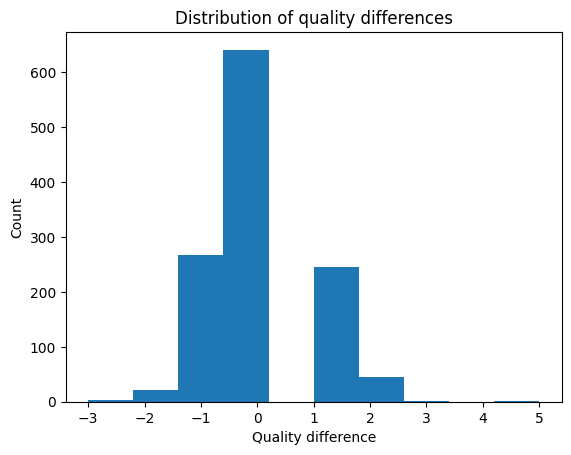

In [9]:
# testing the model
predicted = (regr.predict(X_test)+0.5).astype(int)
diff = y_test - predicted
print(f"mean difference: {diff.mean():.1f}; mean error: {diff.std():.1f}; min diff {diff.min():.1f}; max diff {diff.max():.1f}")
print(f"{diff[diff == 0].shape[0] / diff.shape[0] * 100:.1f}% fits")
plt.hist(diff)
plt.xlabel('Quality difference')
plt.ylabel('Count')
_ = plt.title('Distribution of quality differences of test data set')

In [10]:
from sklearn.metrics import accuracy_score
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = (regr.predict(X_train)+0.5).astype(int))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = predicted)*100:.1f}%")

Train data accuracy: 51.8%
Test  data accuracy: 52.3%


##Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logit = LogisticRegression(max_iter = 50000, C=0.5)
logit.fit(X_train, y_train)
print(f"Train data accuracy: {logit.score(X_train, y_train)*100:.1f}%")
print(f"Test  data accuracy: {logit.score(X_test, y_test)*100:.1f}%")

Train data accuracy: 53.6%
Test  data accuracy: 53.7%


In [13]:
log_pred = logit.predict(X_test)
diff = y_test - log_pred
print(f"mean difference: {diff.mean():.1f} mean error: {diff.std():.1f} min diff {diff.min():.1f} max diff {diff.max():.1f}")

mean difference: 0.1 mean error: 0.8 min diff -3.0 max diff 3.0


In [14]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = logit.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = log_pred)*100:.1f}%")

Train data accuracy: 53.6%
Test  data accuracy: 53.7%


Confusion matrix

In [18]:
from sklearn import metrics
cm_test = metrics.confusion_matrix(y_test, log_pred)
print("Confusion matrix of test data set")
print(cm_test)
cm_train = metrics.confusion_matrix(y_train, logit.predict(X_train))
print("\nConfusion matrix of train data set")
print(cm_train)

Confusion matrix of test data set
[[  0   0   2   3   0   0   0]
 [  0   1  26  15   0   0   0]
 [  0   0 197 154   2   1   0]
 [  0   0 115 418  25   1   0]
 [  0   0  20 152  42   0   0]
 [  0   0   2  37  10   0   0]
 [  0   0   0   2   0   0   0]]

Confusion matrix of train data set
[[   1    0    6    7    1    0    0]
 [   0    0   73   45    3    0    0]
 [   0    0  598  499    6    0    0]
 [   1    0  318 1238   82    0    0]
 [   0    0   43  490  133    0    0]
 [   0    0   15   69   42    0    0]
 [   0    0    0    0    3    0    0]]


##Decision trees

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [22]:
tree_pred = dtree.predict(X_test)
diff = y_test - tree_pred
print(f"mean difference: {diff.mean():.1f} mean error: {diff.std():.1f} min diff {diff.min():.1f} max diff {diff.max():.1f}")

mean difference: -0.0 mean error: 0.8 min diff -3.0 max diff 5.0


In [24]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = tree_pred)*100:.1f}%")

Train data accuracy: 100.0%
Test  data accuracy: 60.2%


In [25]:
cm_test = metrics.confusion_matrix(y_test, tree_pred)
print("Confusion matrix of test data set")
print(cm_test)

Confusion matrix of test data set
[[  0   1   1   3   0   0   0]
 [  1  14  12  12   3   0   0]
 [  0  20 213 103  16   2   0]
 [  1  14 107 353  74  10   0]
 [  0   0   7  54 139  14   0]
 [  1   0   5  12  12  19   0]
 [  0   0   1   0   1   0   0]]


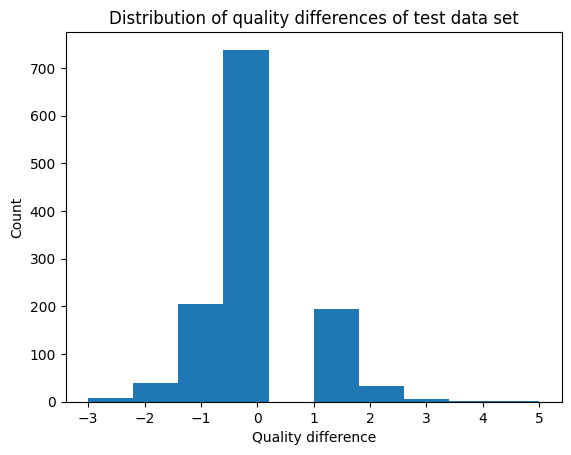

In [26]:
plt.hist(diff)
plt.xlabel('Quality difference')
plt.ylabel('Count')
_ = plt.title('Distribution of quality differences of test data set')

##Neural network

Number of neurons:

$N_h = \frac {N_s} {\alpha \cdot (N_i + N_o)}$

$N_s$ - number of input samples in train data set

$\alpha$ - scaling factor between 2 and 10

$N_i$ - number of input neurons

$N_o$ - number of output neurons

In [49]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=10000,
                    hidden_layer_sizes=(30, 10, 30), random_state=1)
_ = clf.fit(X_train, y_train)

In [50]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = clf.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = clf.predict(X_test))*100:.1f}%")

Train data accuracy: 53.8%
Test  data accuracy: 51.3%


Scaling the data

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),
                     MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(10, 10), random_state=1))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5379591836734694